In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
import sklearn.metrics as metrics
from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('Resources/mainPop.csv')
df.head()

,ID,Cum GPA,TEAS Count,MaxOfTestScore,PrecEducDesc,failing grade count,DateStart,GradDate,Test Delivery Date,Time to Test (days),Completion Time (days),Grade,Qtr,Year
0,1,2.84,1.0,76.0,High School/GED/Some College,0,9/6/2016,4/20/2018,11/15/2018,209.00,591.0,Pass,2018-4,2018
1,2,3.14,1.0,74.7,High School/GED/Some College,0,9/10/2018,12/21/2019,3/3/2020,73.00,467.0,Pass,2020-1,2020
2,3,2.58,NaN,NaN,High School/GED/Some College,0,NaN,5/1/2009,3/29/2019,3619.34,39934.0,Pass,2019-1,2019
3,4,3.45,NaN,NaN,High School/GED/Some College,0,NaN,4/21/2017,5/27/2017,36.34,42846.0,Pass,2017-2,2017
4,5,3.22,1.0,75.3,High School/GED/Some College,0,5/18/2015,12/16/2016,3/10/2017,84.51,578.0,Pass,2017-1,2017


In [3]:
df.count()

ID                        1333
Cum GPA                   1333
TEAS Count                1225
MaxOfTestScore            1225
PrecEducDesc              1333
failing grade count       1333
DateStart                 1331
GradDate                  1333
Test Delivery Date        1333
Time to Test (days)       1333
Completion Time (days)    1333
Grade                     1333
Qtr                       1333
Year                      1333
dtype: int64

In [4]:
df = df.dropna(how='any')
df.count()


ID                        1225
Cum GPA                   1225
TEAS Count                1225
MaxOfTestScore            1225
PrecEducDesc              1225
failing grade count       1225
DateStart                 1225
GradDate                  1225
Test Delivery Date        1225
Time to Test (days)       1225
Completion Time (days)    1225
Grade                     1225
Qtr                       1225
Year                      1225
dtype: int64

In [5]:
# Reorganize columns to ready for preprocessing
df=df[["ID","Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","DateStart","GradDate","Test Delivery Date","Time to Test (days)","Completion Time (days)","Qtr","Year","PrecEducDesc","Grade"]]

In [6]:
model_df = df[["Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","Time to Test (days)","Completion Time (days)","PrecEducDesc","Grade"]]
model_df.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),PrecEducDesc,Grade
0,2.84,1.0,76.0,0,209.00,591.0,High School/GED/Some College,Pass
1,3.14,1.0,74.7,0,73.00,467.0,High School/GED/Some College,Pass
4,3.22,1.0,75.3,0,84.51,578.0,High School/GED/Some College,Pass
5,3.29,2.0,77.3,0,60.00,591.0,High School/GED/Some College,Fail
6,3.38,2.0,72.7,0,80.33,600.0,Associates,Pass


In [7]:
# Step 0: Reformat data
data = model_df.values
X = data[:, 0:6]
y = data[:, 6]

In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: Associates
Encoded Label: 0
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some Colleg

------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: Masters
Encoded Label: 3
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: Associates
Encoded Label: 0
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: High School/GED/Some College
Encoded Label: 2
------------
Original Class: Bachelors
Encoded Label: 1
------------
Original Class: Associates
Encoded Label: 0
------------
Original Clas

In [10]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [11]:
# Send education back to the dataframe
# A -> [0]
# B -> [1]
# Hs -> [2]
# M -> [3]

one_hot_ydf = pd.DataFrame(np.zeros((1225,4)),columns = ['Assoc','Bach','HighSchool','Masters'])
for i in range(len(one_hot_y)):
    for j in range(4):
        one_hot_ydf.iloc[i][j] = one_hot_y[i][j]
one_hot_ydf.dtypes

Assoc         float64
Bach          float64
HighSchool    float64
Masters       float64
dtype: object

In [12]:
model_df

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),PrecEducDesc,Grade
0,2.84,1.0,76.0,0,209.00,591.0,High School/GED/Some College,Pass
1,3.14,1.0,74.7,0,73.00,467.0,High School/GED/Some College,Pass
4,3.22,1.0,75.3,0,84.51,578.0,High School/GED/Some College,Pass
5,3.29,2.0,77.3,0,60.00,591.0,High School/GED/Some College,Fail
6,3.38,2.0,72.7,0,80.33,600.0,Associates,Pass
...,...,...,...,...,...,...,...,...
1328,3.95,1.0,86.0,0,101.53,481.0,Bachelors,Pass
1329,3.64,1.0,77.3,0,27.00,481.0,Bachelors,Pass
1330,3.43,1.0,78.0,0,80.00,481.0,Bachelors,Pass
1331,3.43,1.0,88.0,0,72.00,481.0,Bachelors,Pass


In [13]:
# One-hot on Grade
model_df['GradePass'] = np.where(model_df['Grade']== 'Pass', 1., 0.)
# One-hot on Prev Edu
model_df['HighSchool'] = np.where(model_df['PrecEducDesc'] == 'High School/GED/Some College',1.,0.)
model_df['Assoc'] =  np.where(model_df['PrecEducDesc'] == 'Associates',1.,0.)
model_df['Bach'] = np.where(model_df['PrecEducDesc'] == 'Bachelors',1.,0.)
model_df['Masters'] = np.where(model_df['PrecEducDesc'] == 'Masters',1.,0.)

C:\Users\whall\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\whall\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\whall\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [14]:
#One big hot dataframe
# ['Assoc','Bach','HighSchool','Masters'])
# one_hot_ydf

model_df.tail(50)

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),PrecEducDesc,Grade,GradePass,HighSchool,Assoc,Bach,Masters
1283,3.62,1.0,84.7,0,38.56,481.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1284,3.24,1.0,66.0,0,91.00,474.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1285,3.52,1.0,78.7,0,37.00,474.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1286,3.24,1.0,70.7,0,44.00,600.0,Associates,Pass,1.0,0.0,1.0,0.0,0.0
1287,3.07,1.0,67.3,0,173.00,474.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1288,3.91,1.0,89.3,0,88.00,474.0,Masters,Pass,1.0,0.0,0.0,0.0,1.0
1289,2.84,1.0,78.7,0,83.00,481.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1290,2.60,1.0,70.0,0,75.00,600.0,Bachelors,Fail,0.0,0.0,0.0,1.0,0.0
1291,3.12,1.0,78.7,0,88.00,481.0,High School/GED/Some College,Fail,0.0,1.0,0.0,0.0,0.0
1292,3.69,1.0,75.3,0,91.00,474.0,Associates,Pass,1.0,0.0,1.0,0.0,0.0


In [15]:
# Next 3 lines needed to balance the data since there are significantly more passes than fails
model_df_pass = model_df[model_df["GradePass"]== 1.0]
len(model_df_pass)

898

In [16]:
model_df_fail = model_df[model_df["GradePass"]!= 1.0]
len(model_df_fail)

327

In [17]:
new_model_df = pd.concat([model_df_fail ,model_df_pass.sample(n=len(model_df_fail)) ],copy=True,ignore_index=True)
len(new_model_df)

654

In [18]:
# Assign the data to X and y

X = new_model_df[["Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","Time to Test (days)","Completion Time (days)",
        "HighSchool", "Assoc","Bach","Masters"]]

y = new_model_df["GradePass"].values.reshape(-1, 1)
print(X.shape, y.shape)

(654, 10) (654, 1)


In [19]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### END SOLUTION

In [20]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [21]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [22]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
# model.fit(X_train, y_train)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.28422837059744477
Testing Score: 0.2840686372098432


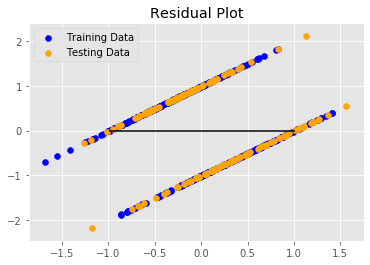

In [24]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [25]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7150803139133216, R2: 0.2840686372098432


In [26]:
print(predictions)

[[ 1.20462894]
 [ 0.06827673]
 [ 0.32573159]
 [-0.27691613]
 [-0.14403396]
 [-0.28460516]
 [-0.02335471]
 [ 0.04808381]
 [ 1.26678401]
 [ 0.85027756]
 [-0.89283987]
 [-0.60086128]
 [-0.05554987]
 [ 1.10709859]
 [ 0.32858152]
 [ 0.10502601]
 [-0.03607423]
 [-0.58581107]
 [ 0.89997255]
 [-0.23971518]
 [ 0.23394317]
 [ 0.08500981]
 [ 0.60837283]
 [-1.17149764]
 [-0.06864575]
 [ 0.49879956]
 [ 0.1734353 ]
 [ 0.12359607]
 [-0.35799906]
 [ 0.166705  ]
 [ 0.78456651]
 [-0.01928119]
 [-0.14198662]
 [ 0.04250105]
 [-0.21671667]
 [-0.61274961]
 [ 0.31371211]
 [ 0.12435551]
 [ 0.4978307 ]
 [ 0.75807193]
 [-0.12659069]
 [-0.95017218]
 [ 0.11663186]
 [ 0.89963665]
 [ 1.202497  ]
 [ 0.13928436]
 [-0.36888443]
 [ 0.39323238]
 [-0.03826039]
 [-0.12214594]
 [ 1.25802263]
 [ 0.67580063]
 [ 0.61854691]
 [ 0.00957756]
 [ 0.09126642]
 [-0.19874717]
 [-0.48301112]
 [ 1.36259745]
 [ 0.47596667]
 [-0.45020741]
 [ 0.28991416]
 [ 1.55758576]
 [-0.35188526]
 [-1.01021261]
 [ 0.34882642]
 [-0.08096819]
 [ 0.89317

In [27]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.28422837059744477
Testing Score: 0.2840686372098432


In [28]:
model.coef_

array([[ 0.38947639, -0.01289963,  0.06227914,  0.00225866, -0.1048735 ,
        -0.12679586, -0.0310181 ,  0.0048521 ,  0.06321391, -0.09265732]])

In [29]:
model.intercept_

array([-1.29478634e-16])

In [30]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7133768786994541, R2: 0.2857740997577001


In [31]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7150793762566413, R2: 0.2840695759824704


In [32]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7139069782755839, R2: 0.2852433692864944


In [33]:
# model_df.to_csv("output_data/model_data.csv", encoding="utf-8", index=False)